In [1]:
!mkdir -p results results/double_dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_breakout

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [5]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('BreakoutDeterministic-v4')
env = Monitor(env, './monitor/double_dqn/breakout', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(4)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_breakout, 
    replay_memory_size=0,
    render_mode='rgb_array'
)
agent.model.load_weights('./models/double_dqn/breakout.h5')
agent

DeepQAgent(
    env=<Monitor<TimeLimit<AtariEnv<BreakoutDeterministic-v4>>>>,
    downsample=Downsampler(y=(32, 14), x=(8, 8), cut=[142]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x1135f1fd0>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x1214c10d0>,
    image_size=(84, 84),
    render_mode='rgb_array'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [09:20<00:00,  5.60s/game]


0     36.0
1     51.0
2     11.0
3     14.0
4     47.0
5     24.0
6     52.0
7     36.0
8     14.0
9      4.0
10    49.0
11    30.0
12    23.0
13    30.0
14    10.0
15    18.0
16    17.0
17    12.0
18    32.0
19     5.0
20    21.0
21    31.0
22    18.0
23    13.0
24    28.0
25    32.0
26    38.0
27     4.0
28    14.0
29    21.0
      ... 
70    16.0
71    18.0
72    96.0
73    17.0
74    16.0
75     9.0
76    23.0
77    17.0
78    21.0
79    18.0
80    56.0
81    10.0
82    24.0
83    19.0
84    13.0
85    26.0
86    60.0
87    30.0
88    65.0
89    17.0
90    34.0
91    41.0
92    11.0
93    13.0
94     6.0
95    31.0
96    13.0
97     8.0
98    17.0
99    47.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/double_dqn/fullydeterministic.csv')

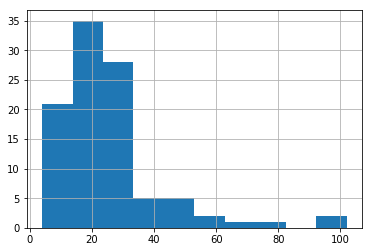

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.000000
mean      25.470000
std       16.926732
min        4.000000
25%       15.000000
50%       21.500000
75%       31.250000
max      102.000000
dtype: float64